In [1]:
import h5py
import numpy as np
import meshio

import matplotlib.pyplot as plt

#Set fonts
from matplotlib import rc, rcParams, cm
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})

In [ ]:
# Plotting function
def PlotLine(y = 2*56.25/25.4, x = 1.5*56.25/25.4, dpi=100):
    fig, ax = plt.subplots(figsize=(y, x), dpi=dpi, tight_layout=True)
    return ax

In [3]:
# Read nodes from mesh file
meshBC = meshio.read("../cracktip_BC.inp")

In [4]:
# Fixed nodes (nodes ahead of the crack tip)
nodes_X = []   
dist_X = []   

for iNod in range(len(meshBC.points[meshBC.point_sets["Fix"]])):

	# Node id, x-coordinate
	nodes_X.append(meshBC.point_sets["Fix"][iNod])
	dist_X.append(meshBC.points[meshBC.point_sets["Fix"]][iNod,0]- 5e-6)

# To numpy array
dist_X = np.array(dist_X)
# Sorting array according to x-coordinate
sort_arr = np.argsort(dist_X)

In [ ]:
# Read the results from the output file 

fh5 = h5py.File("CrackTip_Diffusion_1s_out.hdf5", "r")

con_20 = fh5["Con/Step_20"][()][nodes_X]
con_50 = fh5["Con/Step_50"][()][nodes_X]
con_387 = fh5["Con/Step_387"][()][nodes_X]
con_500 = fh5["Con/Step_500"][()][nodes_X]
con_1000 = fh5["Con/Step_1000"][()][nodes_X]

time_20 = fh5["Time/Step_20"][()]
time_50 = fh5["Time/Step_50"][()]
time_387 = fh5["Time/Step_387"][()]
time_500 = fh5["Time/Step_500"][()]
time_1000 = fh5["Time/Step_1000"][()]

fh5.close()

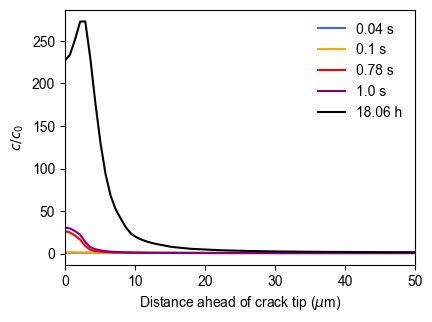

In [14]:
ax = PlotLine()

ax.plot(dist_X[sort_arr]*1e6, con_20[sort_arr]/0.003453, "royalblue", lw=1.5,  label=str(np.round(time_20, 2)[0])+" s")
ax.plot(dist_X[sort_arr]*1e6, con_50[sort_arr]/0.003453, "orange", lw=1.5,  label=str(np.round(time_50, 2)[0])+" s")
ax.plot(dist_X[sort_arr]*1e6, con_387[sort_arr]/0.003453, "r", lw=1.5,  label=str(np.round(time_387, 2)[0])+" s")
ax.plot(dist_X[sort_arr]*1e6, con_500[sort_arr]/0.003453, "purple", lw=1.5,  label=str(np.round(time_500, 2)[0])+" s")
ax.plot(dist_X[sort_arr]*1e6, con_1000[sort_arr]/0.003453, "k", lw=1.5,  label=str(np.round(time_1000/3600, 2)[0])+" h")

ax.set_xlabel("Distance ahead of crack tip ($\\mu$m)")
ax.set_ylabel("$c/c_0$")

ax.set_xlim([0, 50])
# ax.set_ylim([0, 1.8])
ax.legend(frameon=False)

plt.savefig("Con.svg", transparent=True)